<a href="https://colab.research.google.com/github/Hasebul/Food_Image_Classification/blob/main/Project_Scratch_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path ='/content/drive/MyDrive/Project_ML/Refined_data/10_food_classes_refined_data/'

In [ ]:
train_dir = base_path+"train/"
test_dir =  base_path+"test/"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
import os
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Check Number of food classes we have.

In [ ]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


#Preview Image

Image shape: (512, 512, 3)


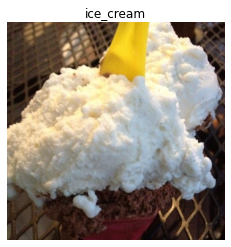

In [ ]:

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


# View a random image from the training dataset

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

#Image Processing 

In [ ]:


# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

print('image processing  done')

Found 10000 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
image processing  done


#our model has 2 convolution layer -> 1 maxpooling layer -> 2 convolution layer -> 1 maxpool layer -> 1 flatten layer -> 1 dense layter

In [ ]:
# Create our model (a clone of model_8, except to be multi-class)
own_model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
own_model.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
own_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

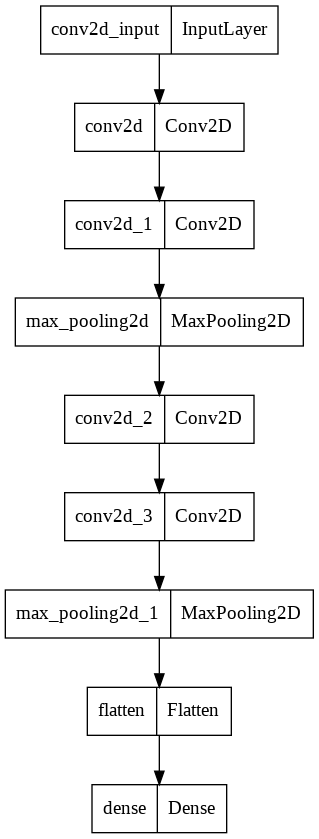

In [ ]:

from tensorflow.keras.utils import plot_model
plot_model(own_model)

In [ ]:
# Fit the model
history = own_model.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
313/313 [==============================] - 2603s 8s/step - loss: 2.1563 - accuracy: 0.2091 - val_loss: 1.8890 - val_accuracy: 0.3608
Epoch 2/5
313/313 [==============================] - 102s 327ms/step - loss: 1.7799 - accuracy: 0.3899 - val_loss: 1.4971 - val_accuracy: 0.5244
Epoch 3/5
313/313 [==============================] - 103s 330ms/step - loss: 1.4230 - accuracy: 0.5254 - val_loss: 1.0499 - val_accuracy: 0.6732
Epoch 4/5
313/313 [==============================] - 103s 329ms/step - loss: 0.9367 - accuracy: 0.6974 - val_loss: 0.7958 - val_accuracy: 0.7764
Epoch 5/5
313/313 [==============================] - 103s 330ms/step - loss: 0.5060 - accuracy: 0.8516 - val_loss: 0.6056 - val_accuracy: 0.8504


In [ ]:
# Evaluate on the test data
own_model.evaluate(test_data)

79/79 [==============================] - 20s 249ms/step - loss: 0.6056 - accuracy: 0.8504


[0.6056217551231384, 0.8503999710083008]

#save out own Model

In [ ]:
own_model.save(base_path+'own_trained_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project_ML/Refined_data/10_food_classes_refined_data/own_trained_model/assets
